# 8.1. Script Principal

In [3]:
#Analisis conjunto de datos 
carpeta_imagenes = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\images"
carpeta_etiquetas = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\labels"
carpeta_mascaras = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\masks"

carpeta_img_totas = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Limpieza\Dataset_Completo"

import os
import numpy as np
import matplotlib.pyplot as plt

total_imagenes = os.listdir(carpeta_img_totas)

print("Total de imagenes: ", len(total_imagenes))

print("****************************************************************************************************")
print("Imagenes procesadas:")
#Cargamos las imagenes
imagenes = os.listdir(carpeta_imagenes)
etiquetas = os.listdir(carpeta_etiquetas)
mascaras = os.listdir(carpeta_mascaras)

#Totales
print("Total de imagenes: ", len(imagenes))
#% de imagenes del total
print("Porcentaje de imagenes del total: ", len(imagenes)/len(total_imagenes)*100)
print("Total de etiquetas: ", len(etiquetas))
print("Total de mascaras: ", len(mascaras))

#Total imagenes sin etiqueta
imagenes_sin_etiqueta = [i for i in imagenes if i not in etiquetas]
print("Total de imagenes sin etiqueta: ", len(imagenes_sin_etiqueta))

#Total imagenes sin mascara
imagenes_sin_mascara = [i for i in imagenes if i not in mascaras]
print("Total de imagenes sin mascara: ", len(imagenes_sin_mascara))

#Total etiquetas sin imagen
etiquetas_sin_imagen = [i for i in etiquetas if i not in imagenes]
print("Total de etiquetas sin imagen: ", len(etiquetas_sin_imagen))

#Total mascaras sin imagen
mascaras_sin_imagen = [i for i in mascaras if i not in imagenes]
print("Total de mascaras sin imagen: ", len(mascaras_sin_imagen))

#Total de imagenes con etiqueta y mascara
imagenes_con_etiqueta = [i for i in imagenes if i in etiquetas]
imagenes_con_mascara = [i for i in imagenes if i in mascaras]
imagenes_con_etiqueta_y_mascara = [i for i in imagenes_con_etiqueta if i in imagenes_con_mascara]
print("Total de imagenes con etiqueta y mascara: ", len(imagenes_con_etiqueta_y_mascara))

print("****************************************************************************************************")
# En train
carpeta_imagenes_train = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\train\images"
carpeta_etiquetas_train = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\train\labels"
carpeta_mascaras_train = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\train\masks"

imagenes_train = os.listdir(carpeta_imagenes_train)
etiquetas_train = os.listdir(carpeta_etiquetas_train)
mascaras_train = os.listdir(carpeta_mascaras_train)

#Totales
print("Total de imagenes train: ", len(imagenes_train))
print("Total de etiquetas train: ", len(etiquetas_train))
print("Total de mascaras train: ", len(mascaras_train))

print("****************************************************************************************************")
# En val
carpeta_imagenes_val = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\val\images"
carpeta_etiquetas_val = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\val\labels"
carpeta_mascaras_val = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\val\masks"

imagenes_val = os.listdir(carpeta_imagenes_val)
etiquetas_val = os.listdir(carpeta_etiquetas_val)
mascaras_val = os.listdir(carpeta_mascaras_val)

#Totales
print("Total de imagenes val: ", len(imagenes_val))
print("Total de etiquetas val: ", len(etiquetas_val))
print("Total de mascaras val: ", len(mascaras_val))



Total de imagenes:  4303
****************************************************************************************************
Imagenes procesadas:
Total de imagenes:  561
Porcentaje de imagenes del total:  13.03741575644899
Total de etiquetas:  561
Total de mascaras:  566
Total de imagenes sin etiqueta:  561
Total de imagenes sin mascara:  561
Total de etiquetas sin imagen:  561
Total de mascaras sin imagen:  566
Total de imagenes con etiqueta y mascara:  0
****************************************************************************************************
Total de imagenes train:  449
Total de etiquetas train:  449
Total de mascaras train:  452
****************************************************************************************************
Total de imagenes val:  112
Total de etiquetas val:  112
Total de mascaras val:  114


1. Introducción

Este notebook está diseñado para preparar datos, dividirlos en conjuntos de entrenamiento/validación, y entrenar un modelo YOLOv8 para detectar huellas de tortugas. Los pasos incluyen:

Configuración de rutas y organización de archivos.
Visualización de etiquetas en las imágenes.
Conversión de etiquetas en formato YOLO.
División del dataset.
Entrenamiento del modelo YOLOv8.

2. Configuración inicial

In [ ]:
# Importar librerías necesarias
import os
import json
import cv2
import shutil
import random
from ultralytics import YOLO

# Configuración de rutas principales
CARPETA_MEZCLADA = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Para_Etiquetar_Huellas"
CARPETA_IMAGENES = os.path.join(CARPETA_MEZCLADA, "images")
CARPETA_JSON = os.path.join(CARPETA_MEZCLADA, "json")

# Crear carpetas separadas para imágenes y JSON
os.makedirs(CARPETA_IMAGENES, exist_ok=True)
os.makedirs(CARPETA_JSON, exist_ok=True)

# Mover archivos a sus respectivas carpetas
for archivo in os.listdir(CARPETA_MEZCLADA):
    ruta_archivo = os.path.join(CARPETA_MEZCLADA, archivo)
    if archivo.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.move(ruta_archivo, os.path.join(CARPETA_IMAGENES, archivo))
    elif archivo.lower().endswith('.json'):
        shutil.move(ruta_archivo, os.path.join(CARPETA_JSON, archivo))

print("Archivos organizados:")
print(f"- Imágenes movidas a: {CARPETA_IMAGENES}")
print(f"- Archivos JSON movidos a: {CARPETA_JSON}")


3. Visualización de etiquetas

In [ ]:
import json
import cv2
import os

def visualizar_etiquetas(carpeta_imagenes, carpeta_json, carpeta_salida):
    """
    Dibuja las etiquetas de huellas en las imágenes basándose en los archivos JSON.
    """
    os.makedirs(carpeta_salida, exist_ok=True)

    for archivo_json in os.listdir(carpeta_json):
        if archivo_json.endswith(".json"):
            ruta_json = os.path.join(carpeta_json, archivo_json)
            ruta_imagen = os.path.join(carpeta_imagenes, archivo_json.replace(".json", ".JPG"))

            if os.path.exists(ruta_imagen):
                # Leer la imagen
                imagen = cv2.imread(ruta_imagen)

                # Leer el archivo JSON
                with open(ruta_json, 'r') as f:
                    datos = json.load(f)

                # Dibujar las etiquetas en la imagen
                for shape in datos.get("shapes", []):
                    if shape["shape_type"] == "linestrip":
                        puntos = shape["points"]
                        for i in range(len(puntos) - 1):
                            x1, y1 = int(puntos[i][0]), int(puntos[i][1])
                            x2, y2 = int(puntos[i + 1][0]), int(puntos[i + 1][1])
                            cv2.line(imagen, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Línea verde

                # Guardar la imagen con etiquetas
                ruta_salida = os.path.join(carpeta_salida, archivo_json.replace(".json", ".JPG"))
                cv2.imwrite(ruta_salida, imagen)

CARPETA_SALIDA_VISUALIZACION = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Imagenes_Con_Etiquetas"
visualizar_etiquetas(CARPETA_IMAGENES, CARPETA_JSON, CARPETA_SALIDA_VISUALIZACION)


4. Generar etiquetas YOLO y vacías

In [21]:
import os
import json
import shutil

def convertir_json_a_yolo(ruta_json, archivo_salida_txt, carpeta_salida_etiquetas, ancho_imagen, alto_imagen):
    """
    Convierte un archivo JSON a formato YOLO con normalización y lo guarda.
    """
    with open(ruta_json, 'r') as f:
        datos = json.load(f)

    yolo_labels = []
    for shape in datos["shapes"]:
        if shape["shape_type"] == "linestrip":
            puntos = shape["points"]
            if len(puntos) >= 2:  # Asegurar que haya al menos dos puntos
                x1, y1 = puntos[0]
                x2, y2 = puntos[-1]
                
                # Normalizar coordenadas
                xc = ((x1 + x2) / 2) / ancho_imagen
                yc = ((y1 + y2) / 2) / alto_imagen
                w = abs(x2 - x1) / ancho_imagen
                h = abs(y2 - y1) / alto_imagen

                # Verificar que las coordenadas están en el rango [0, 1]
                if 0 <= xc <= 1 and 0 <= yc <= 1 and 0 <= w <= 1 and 0 <= h <= 1:
                    yolo_labels.append(f"0 {xc:.6f} {yc:.6f} {w:.6f} {h:.6f}")
                else:
                    print(f"Coordenadas fuera de rango en {archivo_salida_txt}: {xc}, {yc}, {w}, {h}")

    ruta_salida = os.path.join(carpeta_salida_etiquetas, archivo_salida_txt)
    ruta_salida = ruta_salida.replace('.png', '.txt').replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.JPG', '.txt')

    # Guardar etiquetas YOLO solo si hay datos válidos
    if yolo_labels:
        with open(ruta_salida, 'w') as f:
            f.write("\n".join(yolo_labels))

def procesar_imagenes_y_etiquetas(carpeta_imagenes, carpeta_json, carpeta_salida_imagenes, carpeta_salida_etiquetas):
    """
    Copia imágenes con etiquetas JSON asociadas y convierte los JSON en formato YOLO.
    Omite imágenes sin JSON asociado.
    """
    os.makedirs(carpeta_salida_imagenes, exist_ok=True)
    os.makedirs(carpeta_salida_etiquetas, exist_ok=True)

    for archivo in os.listdir(carpeta_imagenes):
        if archivo.lower().endswith(('.jpg', '.jpeg', '.png', '.JPG')):
            archivo_json = archivo.replace('.jpg', '.json').replace('.jpeg', '.json').replace('.png', '.json').replace('.JPG', '.json')
            ruta_json = os.path.join(carpeta_json, archivo_json)
            ruta_imagen = os.path.join(carpeta_imagenes, archivo)

            if os.path.exists(ruta_json):  # Solo procesar imágenes con JSON asociado
                # Obtener dimensiones de la imagen
                import cv2
                imagen = cv2.imread(ruta_imagen)
                alto_imagen, ancho_imagen = imagen.shape[:2]

                # Copiar imagen
                ruta_destino_imagen = os.path.join(carpeta_salida_imagenes, archivo)
                shutil.copy(ruta_imagen, ruta_destino_imagen)

                # Convertir JSON a YOLO
                archivo_txt = archivo.replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt').replace('.JPG', '.txt')
                convertir_json_a_yolo(ruta_json, archivo_txt, carpeta_salida_etiquetas, ancho_imagen, alto_imagen)

def revisar_imagenes_sin_etiquetas(carpeta_imagenes, carpeta_salida_etiquetas):
    """
    Revisa si hay imágenes sin etiquetas YOLO asociadas.
    """
    etiquetas_faltantes = []
    for archivo in os.listdir(carpeta_imagenes):
        if archivo.lower().endswith(('.jpg', '.jpeg', '.png', '.JPG')):
            archivo_txt = archivo.replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt').replace('.JPG', '.txt')
            ruta_txt = os.path.join(carpeta_salida_etiquetas, archivo_txt)
            if not os.path.exists(ruta_txt):
                etiquetas_faltantes.append(archivo)
    return etiquetas_faltantes

# Configuración de carpetas
CARPETA_IMAGENES = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Para_Etiquetar_Huellas\images"
CARPETA_JSON = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Para_Etiquetar_Huellas\json"
CARPETA_SALIDA_IMAGENES = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\images"
CARPETA_SALIDA_ETIQUETAS = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\labels"

# Procesar imágenes y etiquetas
procesar_imagenes_y_etiquetas(CARPETA_IMAGENES, CARPETA_JSON, CARPETA_SALIDA_IMAGENES, CARPETA_SALIDA_ETIQUETAS)

# Revisar imágenes sin etiquetas YOLO asociadas
imagenes_sin_etiquetas = revisar_imagenes_sin_etiquetas(CARPETA_SALIDA_IMAGENES, CARPETA_SALIDA_ETIQUETAS)
print(f"Imágenes sin etiquetas YOLO txt asociadas: {imagenes_sin_etiquetas}")

# Eliminar imágenes sin etiquetas YOLO asociadas
for archivo in imagenes_sin_etiquetas:
    ruta_imagen = os.path.join(CARPETA_SALIDA_IMAGENES, archivo)
    os.remove(ruta_imagen)

print("Proceso completado: imágenes y etiquetas procesadas correctamente.")


Imágenes sin etiquetas YOLO txt asociadas: ['108FTASK_MAX_2283.JPG', '108FTASK_MAX_2291.JPG', '108FTASK_MAX_2294.JPG', '108FTASK_MAX_2301.JPG', '108FTASK_MAX_2302.JPG']
Proceso completado: imágenes y etiquetas procesadas correctamente.


5. Dividir el dataset

In [22]:
def dividir_dataset(carpeta_dataset, carpeta_train, carpeta_val, val_ratio=0.2):
    """
    Divide un conjunto de datos en entrenamiento y validación.
    """
    os.makedirs(os.path.join(carpeta_train, "images"), exist_ok=True)
    os.makedirs(os.path.join(carpeta_train, "labels"), exist_ok=True)
    os.makedirs(os.path.join(carpeta_val, "images"), exist_ok=True)
    os.makedirs(os.path.join(carpeta_val, "labels"), exist_ok=True)

    imagenes = [f for f in os.listdir(os.path.join(carpeta_dataset, "images")) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(imagenes)

    val_size = int(len(imagenes) * val_ratio)

    for i, imagen in enumerate(imagenes):
        etiqueta = imagen.replace(".jpg", ".txt").replace(".jpeg", ".txt").replace(".png", ".txt").replace(".JPG", ".txt")
        set_destino = carpeta_val if i < val_size else carpeta_train

        shutil.copy(os.path.join(carpeta_dataset, "images", imagen), os.path.join(set_destino, "images", imagen))
        shutil.copy(os.path.join(carpeta_dataset, "labels", etiqueta), os.path.join(set_destino, "labels", etiqueta))

CARPETA_DATASET = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado"
CARPETA_TRAIN = os.path.join(CARPETA_DATASET, "train")
CARPETA_VAL = os.path.join(CARPETA_DATASET, "val")
dividir_dataset(CARPETA_DATASET, CARPETA_TRAIN, CARPETA_VAL)


6. Entrenar YOLO

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from ultralytics import YOLO

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from ultralytics import YOLO

def entrenar_yolo(data_path, modelo_salida, epochs=1000, img_size=640):
    """
    Entrena un modelo YOLOv8 con el dataset proporcionado.
    """
    modelo = YOLO("yolov8n.pt")
    modelo.train(
        data=data_path,
        epochs=epochs,
        imgsz=img_size,
        save_period=10,
        project=os.path.dirname(modelo_salida),
        name=os.path.basename(modelo_salida).split('.')[0]
    )

DATA_PATH = r"C:\Users\Carlos\Desktop\pepe\data_other_pc.yaml"
MODELO_SALIDA = r"C:\Users\Carlos\Desktop\pepe\yolov8_model.pt"
entrenar_yolo(DATA_PATH, MODELO_SALIDA)


Ultralytics 8.3.49  Python-3.10.13 torch-2.5.1+cpu CPU (13th Gen Intel Core(TM) i9-13900KF)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\Carlos\Desktop\pepe\data_other_pc.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=C:\Users\Carlos\Desktop\pepe, name=yolov8_model6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

train: Scanning C:\Users\Carlos\Desktop\pepe\Dataset_Organizado\train\labels.cache... 449 images, 0 backgrounds, 0 corrupt: 100%|██████████| 449/449 [00:00<?, ?it/s]
val: Scanning C:\Users\Carlos\Desktop\pepe\Dataset_Organizado\val\labels.cache... 112 images, 0 backgrounds, 0 corrupt: 100%|██████████| 112/112 [00:00<?, ?it/s]

Plotting labels to C:\Users\Carlos\Desktop\pepe\yolov8_model6\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to C:\Users\Carlos\Desktop\pepe\yolov8_model6
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000         0G      3.096      3.328      2.562          5        640: 100%|██████████| 29/29 [00:37<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]

                   all        112        557     0.0075      0.452     0.0172    0.00467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000         0G      2.805      2.891      2.243         11        640: 100%|██████████| 29/29 [00:36<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.00it/s]

                   all        112        557     0.0188      0.431     0.0279    0.00754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000         0G        2.8      2.873      2.248         12        640: 100%|██████████| 29/29 [00:36<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]

                   all        112        557     0.0286     0.0395     0.0071    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000         0G      2.774      2.841      2.248         12        640: 100%|██████████| 29/29 [00:37<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.23s/it]

                   all        112        557     0.0317      0.118      0.017    0.00397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000         0G      2.697      2.783      2.223          4        640: 100%|██████████| 29/29 [00:36<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.07s/it]

                   all        112        557     0.0941      0.111     0.0321    0.00871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000         0G      2.667      2.721      2.181          9        640: 100%|██████████| 29/29 [00:36<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]

                   all        112        557      0.112      0.154     0.0511     0.0145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000         0G      2.622      2.652      2.133          6        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

                   all        112        557      0.112      0.133     0.0489     0.0141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000         0G      2.572      2.647      2.111          5        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]

                   all        112        557     0.0688     0.0898     0.0191    0.00609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000         0G      2.605      2.683      2.184         12        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.08s/it]

                   all        112        557      0.107      0.106     0.0369     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000         0G      2.541      2.616      2.125          9        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]

                   all        112        557       0.11      0.133     0.0431     0.0133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000         0G      2.563      2.611      2.123          9        640: 100%|██████████| 29/29 [00:36<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.126      0.126     0.0411     0.0126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000         0G      2.527      2.621      2.106          3        640: 100%|██████████| 29/29 [00:37<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]

                   all        112        557     0.0981      0.115     0.0498     0.0157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000         0G      2.464      2.625      2.129         15        640: 100%|██████████| 29/29 [00:36<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]

                   all        112        557     0.0873      0.185     0.0413     0.0126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000         0G      2.437      2.576      2.049          3        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]

                   all        112        557     0.0992      0.156     0.0505     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000         0G      2.497      2.528      2.051         14        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557       0.17      0.135     0.0651     0.0193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000         0G      2.423      2.531      2.051          7        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        112        557       0.11      0.115      0.042     0.0129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000         0G       2.46      2.667      2.084          2        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.165      0.117     0.0642     0.0231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000         0G      2.466      2.586      2.097          5        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all        112        557       0.19      0.201     0.0975     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000         0G      2.449       2.54      2.079          2        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]

                   all        112        557      0.136      0.178     0.0631     0.0181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000         0G      2.435      2.534      2.033          3        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]

                   all        112        557      0.163      0.154     0.0713     0.0226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000         0G      2.413      2.525      2.026         13        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        112        557      0.158      0.194     0.0814     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000         0G      2.416       2.52      2.043         13        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]

                   all        112        557      0.211      0.208     0.0935     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000         0G      2.348      2.504      2.015          1        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]

                   all        112        557      0.158      0.194      0.089     0.0293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000         0G      2.361      2.429      2.015          9        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]

                   all        112        557       0.14      0.176     0.0734     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000         0G       2.29      2.748      1.922          0        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        112        557      0.186      0.221      0.101     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000         0G      2.348      2.466      1.984         11        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        112        557      0.164      0.212     0.0704     0.0229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000         0G      2.331      2.419      1.979          8        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.228      0.224      0.133     0.0415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000         0G      2.354      2.486      1.978          4        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        112        557      0.239      0.174      0.102     0.0321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000         0G      2.338       2.44      2.001         12        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        112        557      0.165       0.18     0.0729      0.024



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000         0G      2.299      2.431       1.98          1        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]

                   all        112        557       0.18      0.176     0.0937     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000         0G      2.271      2.458      1.958          4        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.165      0.156     0.0596     0.0192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000         0G      2.284      2.373       1.96         17        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]

                   all        112        557      0.243      0.156     0.0826     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000         0G      2.289      2.397      1.961         30        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        112        557      0.214      0.176      0.116     0.0388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000         0G      2.246      2.479      1.936          1        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        112        557      0.198      0.178     0.0992     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000         0G      2.295      2.412      1.987          3        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

                   all        112        557      0.254      0.199      0.142     0.0471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000         0G      2.234      2.366      1.937         18        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.229      0.214      0.126     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000         0G      2.231      2.322      1.918          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.263      0.223      0.146      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000         0G      2.238      2.336      1.911          6        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        112        557      0.227      0.162        0.1     0.0367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000         0G      2.194      2.305      1.909          6        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]

                   all        112        557       0.22      0.219      0.113     0.0367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000         0G      2.274      2.381      1.955         22        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        112        557      0.213       0.16      0.108     0.0366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000         0G      2.218      2.328      1.894         11        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all        112        557      0.204      0.144     0.0852     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000         0G      2.133      2.604      1.839          0        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all        112        557      0.276      0.215      0.131      0.043



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000         0G      2.249      2.325      1.905         14        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all        112        557      0.282      0.233      0.168     0.0613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000         0G      2.181      2.327      1.894          4        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        112        557      0.272      0.217      0.153     0.0584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000         0G      2.235      2.354      1.906         13        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.231      0.214      0.146     0.0501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000         0G      2.275      2.346      1.937          9        640: 100%|██████████| 29/29 [00:36<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        112        557      0.255      0.189      0.117     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000         0G      2.203      2.312      1.907          8        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.228      0.197      0.132      0.044



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000         0G      2.213      2.333      1.877          2        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.216       0.18      0.131     0.0429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000         0G      2.175      2.296      1.869          7        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        112        557      0.276      0.237      0.156     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000         0G      2.213      2.274      1.886         12        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.286      0.241      0.172     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000         0G      2.161      2.552      1.814          1        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        112        557      0.238      0.199      0.116     0.0405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000         0G      2.208      2.295      1.912          9        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all        112        557      0.249      0.229      0.152     0.0558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000         0G      2.134      2.273      1.872         16        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all        112        557      0.275      0.214      0.146     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000         0G      2.162       2.29      1.864          3        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        112        557       0.26      0.219      0.169     0.0598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000         0G      2.192      2.392      1.923          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.261      0.194      0.157     0.0538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000         0G      2.189      2.333      1.876          4        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        112        557      0.254      0.214      0.139     0.0482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000         0G      2.145      2.222      1.844          8        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        112        557      0.218      0.194      0.113     0.0383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000         0G      2.156      2.244      1.846         11        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        112        557      0.272       0.21      0.151     0.0522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000         0G      2.173      2.256      1.857          3        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        112        557      0.313      0.242       0.19     0.0663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000         0G      2.115      2.237      1.845          6        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        112        557      0.237      0.224      0.133     0.0493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000         0G      2.143       2.24      1.838          8        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.297      0.237      0.169     0.0589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000         0G      2.131      2.226      1.843          5        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.263      0.207      0.148     0.0489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000         0G      2.092      2.197      1.799          6        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        112        557      0.304      0.203      0.155     0.0515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000         0G      2.097      2.228      1.835          2        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all        112        557       0.26      0.228      0.165     0.0592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000         0G      2.087      2.227      1.822         12        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.275      0.226       0.15      0.052



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000         0G      2.134       2.15      1.817          9        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        112        557      0.254      0.215      0.146     0.0543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000         0G      2.116      2.216      1.813         16        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.283      0.262      0.183     0.0663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000         0G      2.067      2.223      1.804          9        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.298      0.197      0.146     0.0538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000         0G      2.206      2.399      1.844          1        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        112        557      0.276      0.248      0.179     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000         0G      2.149      2.221      1.873          5        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.268      0.227      0.166     0.0613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000         0G      2.101      2.163      1.821          4        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        112        557      0.263       0.23      0.148     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000         0G      2.099      2.195       1.81          9        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.283      0.208      0.148     0.0501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000         0G       2.04      2.198      1.777          3        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        112        557      0.255      0.202      0.152     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000         0G      2.085      2.211      1.811          5        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.272      0.223       0.16     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000         0G      2.047      2.149       1.78         10        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all        112        557      0.273       0.23      0.172     0.0605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000         0G      2.074      2.154      1.796          8        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        112        557      0.329      0.278      0.214      0.079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000         0G      2.028      2.107      1.758          5        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.301      0.266      0.195     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000         0G      2.119      2.174      1.821          6        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.274      0.239      0.171     0.0634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000         0G      2.042      2.147      1.791          3        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.305      0.237      0.167     0.0591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000         0G      2.086      2.176      1.814          5        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.278      0.247      0.179     0.0644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000         0G      2.117      2.295      1.864          1        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.309      0.224      0.179     0.0665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000         0G      2.051      2.139      1.791         14        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.279      0.235      0.189     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000         0G      2.078      2.141      1.801         10        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.334      0.257      0.192     0.0703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000         0G      2.037      2.181      1.768          3        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.294      0.226      0.181      0.062



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000         0G       2.01       2.08      1.737          9        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]

                   all        112        557      0.231      0.206      0.127     0.0417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000         0G      2.015      2.069       1.77          8        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        112        557      0.266      0.226      0.154     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000         0G      2.023      2.064      1.765          6        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.308      0.255      0.212     0.0751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000         0G      2.071      2.176       1.79          4        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all        112        557      0.244      0.201      0.138     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000         0G      2.039      2.126      1.762          6        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.278       0.26      0.166     0.0593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000         0G      1.994      2.017      1.747         55        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        112        557      0.366      0.248      0.206      0.073



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000         0G      2.021      2.079      1.771          9        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.321      0.257      0.203     0.0786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000         0G      2.015      2.084      1.757          5        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        112        557       0.28       0.24       0.17     0.0606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000         0G      1.934      2.019      1.698          4        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.308      0.273      0.188     0.0689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000         0G      1.972      2.037      1.737         14        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.304      0.257      0.189     0.0686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000         0G      1.989      2.087      1.745          3        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.363      0.233      0.215     0.0826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000         0G       1.96      2.018      1.721         10        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.319      0.223      0.174     0.0609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000         0G      2.015      2.041      1.733         21        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.267      0.194      0.141     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000         0G      1.992        2.1      1.786          8        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.262      0.223      0.155     0.0579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000         0G      2.002      2.044       1.74         12        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.295      0.242      0.175     0.0642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000         0G      1.975      2.181      1.772          1        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.249      0.219      0.145     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000         0G      1.958      1.989      1.698         14        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.291       0.21      0.136     0.0451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000         0G      1.991      2.061       1.74         10        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.334      0.239      0.191     0.0705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000         0G      1.947       2.15      1.723          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        112        557      0.291      0.257      0.173     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000         0G      1.992      2.059      1.722         12        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.374      0.228      0.198     0.0764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000         0G      1.977      2.105      1.742         17        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        112        557      0.311      0.224      0.165     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000         0G      1.942      2.005      1.716          8        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.329      0.215       0.17     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000         0G      1.912      1.999      1.692         14        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.333      0.268      0.182     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000         0G      1.904       1.99      1.685          2        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557       0.27      0.214      0.144     0.0478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000         0G      1.909      1.973      1.693          7        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.287      0.258      0.191     0.0678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000         0G      1.966      2.056      1.723          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557       0.34      0.239      0.187     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000         0G      1.965      2.067      1.696          7        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.311      0.232      0.174     0.0619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000         0G      1.926      1.998      1.695         10        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.323      0.232      0.184     0.0609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000         0G      1.912      1.928      1.669         13        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.339       0.25        0.2     0.0761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000         0G      1.907      2.052      1.697          3        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.367      0.246      0.219     0.0855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000         0G       1.88      1.902      1.648          5        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.361      0.257        0.2     0.0748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000         0G      1.945      1.945       1.68         11        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        112        557      0.283      0.241       0.18     0.0665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000         0G      1.889       1.93      1.672         18        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.318      0.271      0.211     0.0787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000         0G      1.926      1.989      1.678          5        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        112        557      0.366      0.289      0.209     0.0759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000         0G      1.896      2.043      1.678          7        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.314      0.287      0.196     0.0726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000         0G      1.888       1.93      1.663         14        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.378      0.263      0.191     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000         0G      1.926      1.948      1.695         10        640: 100%|██████████| 29/29 [00:36<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.321      0.282      0.196     0.0749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000         0G      1.938      1.965      1.702          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.273      0.197      0.146     0.0517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000         0G      1.861      1.887      1.649         24        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.301      0.264      0.185     0.0713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000         0G      1.891      1.882      1.661         19        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.329      0.237      0.191     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000         0G      1.903      1.947      1.666         16        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.315      0.251      0.197     0.0752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000         0G      1.904       1.91       1.66          4        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.262      0.232      0.159     0.0585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000         0G      1.879      1.917      1.651         21        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.283      0.192      0.153     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000         0G      1.899      1.931      1.654          3        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.314      0.269      0.223     0.0818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000         0G      1.878      1.882      1.654         11        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        112        557      0.276      0.242      0.176     0.0588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000         0G      1.888      1.918      1.666         31        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.317      0.251      0.173     0.0577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000         0G       1.84      1.892       1.64          3        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.308      0.271      0.183     0.0652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000         0G      1.873      1.838      1.614         11        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.311      0.215      0.181     0.0649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000         0G      1.884      1.889      1.653          8        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.301      0.242      0.181     0.0668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000         0G      1.859      1.897      1.655          4        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.306      0.226      0.165     0.0567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000         0G      1.869      1.894       1.67         13        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.419      0.232      0.223     0.0774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000         0G      1.816      2.053      1.575          1        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.321      0.233      0.195     0.0675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000         0G      1.892      1.879      1.646         44        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.375      0.233      0.212     0.0732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000         0G      1.838      1.947      1.622          1        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.365      0.228      0.201     0.0756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000         0G      1.794      1.829      1.597          4        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.338      0.212      0.199     0.0717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000         0G       1.83      1.808      1.621          9        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.293      0.223      0.166     0.0551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000         0G       1.85      1.828      1.633          8        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.316       0.21      0.177     0.0603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000         0G      1.834      1.844      1.619          4        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        112        557      0.275      0.239      0.165     0.0558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000         0G      1.803      1.788      1.592         11        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.333      0.246      0.205     0.0803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000         0G       1.89      1.868      1.609          6        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557        0.3       0.28      0.195     0.0677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000         0G      1.741      2.087      1.538          0        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.345      0.253      0.212     0.0825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000         0G      1.816      1.826      1.583          1        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557       0.33      0.243      0.195     0.0685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000         0G      1.846       1.88      1.647         12        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.282      0.246      0.188     0.0678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000         0G        1.8      1.826      1.584          3        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.355      0.248       0.21     0.0758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000         0G      1.824      1.825       1.61          4        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.247      0.231      0.157     0.0534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000         0G       1.78      1.783      1.588          6        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.346      0.224      0.184     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000         0G      1.881      1.849      1.644         21        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        112        557      0.372      0.251      0.204     0.0696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000         0G      1.821      1.793      1.593         20        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557       0.31      0.233      0.182     0.0625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000         0G      1.806      1.793        1.6         11        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.312      0.232      0.179      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000         0G      1.811      1.823      1.594         10        640: 100%|██████████| 29/29 [00:36<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.357      0.255      0.215     0.0715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000         0G      1.795      1.818      1.595         16        640: 100%|██████████| 29/29 [00:38<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        112        557      0.266      0.217      0.154       0.05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000         0G      1.803      1.767       1.58         10        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.329      0.237      0.184     0.0623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000         0G      1.782      1.754      1.567         10        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        112        557      0.306      0.219       0.17      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000         0G      1.796       1.77      1.566         10        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.287      0.215      0.157     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000         0G      1.824      1.773      1.593         14        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.274      0.239      0.165     0.0623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000         0G      1.834      1.809       1.62          7        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.267      0.266      0.171     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000         0G      1.813      1.792      1.619          6        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.345      0.275      0.222     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000         0G      1.857      1.851      1.602          9        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.342       0.28      0.213     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000         0G      1.752      1.757      1.562          1        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.278      0.226      0.172     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000         0G      1.777      1.767      1.568          5        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.294      0.211      0.157     0.0538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000         0G      1.828      1.802      1.601         12        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.319      0.257      0.204     0.0741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000         0G      1.765      1.797      1.581          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        112        557      0.285      0.285      0.181     0.0613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000         0G      1.793      1.788      1.599         13        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.342      0.238      0.189     0.0632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000         0G      1.795      1.795      1.608          5        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.274      0.262      0.189      0.064



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000         0G      1.751      1.738      1.556          3        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.335      0.244      0.191     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000         0G      1.765      1.743       1.56          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.338      0.273       0.23     0.0854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000         0G      1.715      1.696      1.544          4        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.336      0.309      0.223     0.0807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000         0G      1.716      1.705      1.533          7        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.356      0.246      0.208     0.0698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000         0G      1.737      1.722      1.579          4        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.275      0.285      0.201     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000         0G      1.758      1.749      1.568         19        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.409      0.259      0.232     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000         0G      1.762      1.758      1.543         22        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.307      0.293      0.225     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000         0G      1.789      1.774      1.579         10        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.337      0.282      0.204     0.0751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000         0G      1.771      1.738      1.566         26        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        112        557      0.349      0.278      0.223     0.0797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000         0G      1.753      2.035      1.531          1        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.361      0.289      0.226     0.0826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000         0G      1.753      1.788      1.559          3        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557       0.35      0.246      0.204     0.0767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000         0G      1.764      1.737      1.616          1        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.352      0.242      0.183     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000         0G       1.76      1.783      1.582          3        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.423      0.244      0.223     0.0807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000         0G      1.732      1.648      1.518          6        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.381      0.266      0.228      0.078



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000         0G       1.78      1.811      1.586          6        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.344       0.28      0.227     0.0766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000         0G       1.71      1.791      1.535          3        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.356      0.242      0.197     0.0752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000         0G      1.716      1.659      1.541         29        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.336      0.241       0.19     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/1000         0G      1.698       1.67      1.525          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.341      0.264      0.206     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/1000         0G      1.712      1.673      1.553          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.318      0.235      0.183      0.065



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/1000         0G      1.709      1.659      1.534         20        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.298      0.264      0.185     0.0703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/1000         0G      1.726      1.704      1.549         11        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.357      0.237      0.196      0.068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/1000         0G      1.755      1.694      1.569          6        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.396      0.226      0.186     0.0658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/1000         0G      1.641      1.845      1.474          0        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.449      0.264      0.235      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/1000         0G      1.719      1.685      1.545         10        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.274      0.242      0.176     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/1000         0G      1.652       1.63      1.497         10        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.328      0.291      0.204     0.0693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/1000         0G      1.729      1.692      1.546          7        640: 100%|██████████| 29/29 [00:35<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.388      0.235      0.211     0.0732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/1000         0G      1.717      1.704       1.53          8        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.367      0.248      0.214      0.084



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   196/1000         0G      1.647      1.673      1.483          1        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.372      0.264      0.213     0.0781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   197/1000         0G       1.67      1.646      1.512         14        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.344      0.262      0.222     0.0759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   198/1000         0G      1.706      1.697      1.539         13        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.314      0.244      0.196     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   199/1000         0G      1.701      1.668      1.512          6        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.354      0.242      0.203     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   200/1000         0G      1.689      1.598      1.501          6        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.426      0.217      0.209     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   201/1000         0G      1.678      1.632      1.512         13        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.369      0.219      0.196     0.0686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   202/1000         0G      1.699      1.761      1.534          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.356      0.269      0.209     0.0741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   203/1000         0G      1.631       1.56       1.47         15        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.382      0.239      0.214     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   204/1000         0G      1.655      1.615      1.483          5        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.311       0.23      0.186     0.0649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   205/1000         0G      1.652      1.603      1.485          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.356      0.287      0.208     0.0741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   206/1000         0G      1.648      1.578      1.478         10        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.354      0.266      0.208      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   207/1000         0G       1.67      1.619      1.472         14        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.385      0.215      0.182     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   208/1000         0G      1.722      1.701      1.532          3        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.325      0.271      0.189     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   209/1000         0G      1.679       1.61      1.498          6        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.365      0.248      0.209     0.0725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   210/1000         0G      1.594      1.861      1.439          0        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.322      0.259      0.186     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   211/1000         0G      1.661      1.602      1.486         12        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.371      0.232      0.207     0.0699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   212/1000         0G      1.586      1.839       1.43          0        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.361      0.268      0.223     0.0758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   213/1000         0G      1.669       1.63      1.494          4        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.398      0.289      0.228     0.0783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   214/1000         0G      1.626      1.527      1.462         11        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557       0.41      0.241      0.209     0.0763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   215/1000         0G      1.564      1.639      1.406          0        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.367      0.246      0.212     0.0736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   216/1000         0G      1.644      1.552      1.494          4        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.331      0.285      0.232     0.0827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   217/1000         0G      1.623      1.538      1.464          9        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.358      0.289      0.219     0.0783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   218/1000         0G      1.655      1.604      1.496          6        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.276      0.287       0.19     0.0687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   219/1000         0G      1.623       1.62      1.461          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.385      0.233      0.195     0.0652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   220/1000         0G      1.695      1.618      1.525          5        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.322      0.242      0.177     0.0594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   221/1000         0G      1.665      1.605      1.497         10        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.317      0.219      0.169     0.0589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   222/1000         0G      1.622      1.566      1.469         17        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.318      0.273      0.191     0.0668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   223/1000         0G      1.654      1.606      1.485          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.315       0.26      0.181     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   224/1000         0G      1.749      1.606      1.544          6        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.358       0.26      0.204      0.071



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   225/1000         0G      1.696      1.596        1.5          4        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.342      0.215      0.169     0.0587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   226/1000         0G      1.643      1.562      1.476          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.344      0.257        0.2     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   227/1000         0G      1.554      1.455      1.406          1        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.393      0.221      0.185     0.0623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   228/1000         0G      1.639      1.551      1.474          9        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.403      0.248      0.192      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   229/1000         0G      1.643      1.566      1.464          6        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.367      0.259      0.214      0.075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   230/1000         0G      1.612      1.544      1.451          6        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557       0.37      0.273       0.21     0.0721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   231/1000         0G      1.644       1.59      1.483          9        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.356      0.284      0.206     0.0698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   232/1000         0G      1.597      1.539       1.48          3        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.279      0.244       0.17     0.0609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   233/1000         0G      1.599       1.52       1.47          2        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.422      0.215      0.203     0.0715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   234/1000         0G      1.552      1.772      1.397          0        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.363      0.253      0.219     0.0768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   235/1000         0G      1.579      1.552      1.432          7        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.339      0.244      0.216     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   236/1000         0G      1.615      1.571      1.478         20        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all        112        557      0.317      0.273      0.208     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   237/1000         0G      1.601      1.491      1.447         30        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.318      0.259      0.193     0.0677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   238/1000         0G      1.608      1.508      1.447          5        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all        112        557      0.355      0.241      0.193     0.0655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   239/1000         0G      1.543      1.732      1.405          0        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.307      0.262      0.178     0.0577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   240/1000         0G      1.667      1.593      1.497         31        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.365      0.276      0.213     0.0679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   241/1000         0G      1.634      1.534      1.469          5        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.359      0.248      0.206     0.0687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   242/1000         0G      1.578      1.473      1.432         12        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.327      0.269      0.188     0.0658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   243/1000         0G      1.604      1.512      1.449         11        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.421      0.224      0.207     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   244/1000         0G      1.579      1.506      1.435         10        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.348      0.215      0.178     0.0629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   245/1000         0G      1.574      1.472      1.425         14        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.355      0.242      0.193     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   246/1000         0G      1.596      1.501       1.44          9        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.368       0.25      0.194     0.0666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   247/1000         0G      1.565       1.44      1.402         11        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557       0.36       0.26      0.212     0.0701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   248/1000         0G       1.59      1.508      1.441          3        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.329      0.217      0.172     0.0603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   249/1000         0G      1.631      1.577      1.468          2        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all        112        557      0.387       0.23      0.201     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   250/1000         0G      1.575      1.492      1.438          8        640: 100%|██████████| 29/29 [00:35<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.371      0.257      0.193     0.0668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   251/1000         0G       1.56      1.472      1.415          7        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.292      0.237      0.176     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   252/1000         0G      1.596      1.466       1.43         20        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.278      0.276      0.185     0.0629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   253/1000         0G      1.543      1.449      1.431         14        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.362       0.25      0.193     0.0688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   254/1000         0G      1.532      1.705      1.419          1        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557        0.4      0.259      0.208     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   255/1000         0G      1.609      1.506      1.468          7        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.437      0.244      0.224     0.0794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   256/1000         0G      1.564      1.483      1.429          9        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.432      0.235      0.221     0.0748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   257/1000         0G      1.592      1.469      1.458          5        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557       0.38      0.248      0.203       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   258/1000         0G      1.539      1.494      1.419          2        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.406      0.233      0.206     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   259/1000         0G      1.565      1.448      1.433         11        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.369      0.262      0.215     0.0757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   260/1000         0G      1.551      1.434      1.398         15        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.386      0.206      0.188     0.0643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   261/1000         0G      1.562      1.516      1.408          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        112        557      0.326      0.253      0.198     0.0693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   262/1000         0G      1.533       1.45      1.396          5        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.331      0.276        0.2     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   263/1000         0G      1.566      1.472      1.415          4        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        112        557      0.319      0.233      0.163      0.056



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   264/1000         0G      1.561      1.481      1.418          3        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all        112        557      0.306      0.287       0.21     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   265/1000         0G      1.559      1.478      1.418          7        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.333       0.26      0.194     0.0646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   266/1000         0G      1.589      1.486      1.435         25        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.312      0.212      0.152     0.0511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   267/1000         0G      1.601      1.527      1.466          6        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557       0.39      0.233      0.205     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   268/1000         0G      1.582      1.494      1.424         10        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.344      0.282      0.209     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   269/1000         0G      1.528      1.482        1.4          2        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.307      0.255      0.183       0.06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   270/1000         0G      1.531      1.441      1.406          5        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.343      0.264        0.2     0.0671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   271/1000         0G       1.53      1.432      1.381          3        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.302      0.248       0.17      0.057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   272/1000         0G      1.545      1.441       1.41          3        640: 100%|██████████| 29/29 [00:36<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.337      0.245      0.199      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   273/1000         0G      1.518      1.394      1.393         13        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.356      0.264      0.202     0.0699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   274/1000         0G      1.524      1.404      1.419          2        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.345      0.244      0.192     0.0671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   275/1000         0G      1.549      1.509      1.449         14        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.319      0.285      0.204     0.0707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   276/1000         0G      1.546      1.448      1.405          5        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        112        557      0.341      0.233      0.194      0.067



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   277/1000         0G      1.568      1.413      1.401         11        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.345       0.26      0.198     0.0649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   278/1000         0G      1.586      1.529      1.433          3        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.372      0.257      0.212     0.0699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   279/1000         0G       1.53      1.417      1.413          9        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.369      0.259      0.205     0.0699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   280/1000         0G      1.505      1.391      1.387          4        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.316      0.237      0.171     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   281/1000         0G      1.523      1.374      1.396          1        640: 100%|██████████| 29/29 [00:36<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.372      0.235      0.196     0.0681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   282/1000         0G      1.522      1.384      1.399          6        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.381      0.242      0.216     0.0757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   283/1000         0G      1.521      1.353       1.38         13        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557       0.49      0.214        0.2     0.0725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   284/1000         0G      1.521       1.41      1.379          3        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.378       0.25      0.199     0.0707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   285/1000         0G      1.541      1.442      1.402          5        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.343      0.276      0.212     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   286/1000         0G      1.487      1.375      1.364          6        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        112        557      0.295      0.293      0.206     0.0679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   287/1000         0G      1.533       1.42      1.405         25        640: 100%|██████████| 29/29 [00:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        112        557      0.352      0.278      0.213     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   288/1000         0G      1.562      1.438      1.428          8        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        112        557      0.329      0.237      0.177      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   289/1000         0G      1.531      1.432      1.434         25        640: 100%|██████████| 29/29 [00:36<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        112        557      0.358      0.269      0.206     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   290/1000         0G      1.536       1.39      1.407          4        640: 100%|██████████| 29/29 [00:35<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        112        557      0.316      0.266      0.189     0.0701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   291/1000         0G      1.448      1.431      1.329          0        640: 100%|██████████| 29/29 [00:35<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        112        557      0.415      0.244      0.207     0.0741
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 191, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



291 epochs completed in 3.191 hours.
Optimizer stripped from C:\Users\Carlos\Desktop\pepe\yolov8_model6\weights\last.pt, 6.3MB
Optimizer stripped from C:\Users\Carlos\Desktop\pepe\yolov8_model6\weights\best.pt, 6.3MB

Validating C:\Users\Carlos\Desktop\pepe\yolov8_model6\weights\best.pt...
Ultralytics 8.3.49  Python-3.10.13 torch-2.5.1+cpu CPU (13th Gen Intel Core(TM) i9-13900KF)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


                   all        112        557       0.45      0.265      0.234     0.0859
Speed: 0.4ms preprocess, 15.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to C:\Users\Carlos\Desktop\pepe\yolov8_model6


In [11]:
# Cargar el modelo entrenado
modelo = YOLO(r"C:\Users\crome\Desktop\TFM\Modelos_Finales\yolov8_model6\weights\best.pt")


image 1/1 C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\images\108FTASK_MAX_2379.JPG: 480x640 9 turtle_tracks, 61.9ms
Speed: 4.0ms preprocess, 61.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


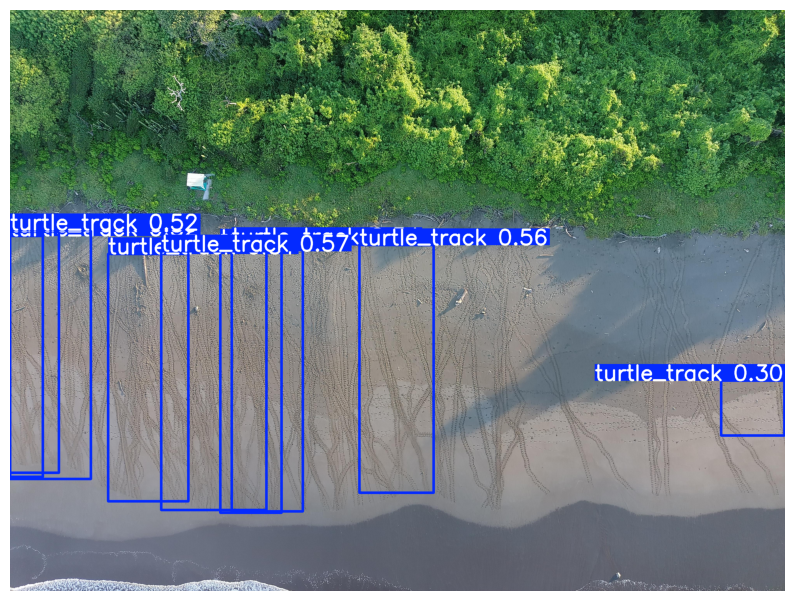

In [12]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Ruta a una imagen de prueba
imagen_prueba = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\images\108FTASK_MAX_2379.JPG"

# Realizar la predicción
resultados = modelo(imagen_prueba)

# Dibujar las predicciones sobre la imagen
imagen_con_predicciones = resultados[0].plot()
%matplotlib inline
# Mostrar la imagen con predicciones
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(imagen_con_predicciones, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()



In [15]:
# Validar el modelo en el conjunto de validación
modelo.val(data=r"C:\Users\crome\Desktop\TFM\Codigo\data.yaml")

Ultralytics 8.3.39  Python-3.10.4 torch-2.1.0+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)


val: Scanning C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\val\labels... 112 images, 0 backgrounds, 0 corrupt: 100%|██████████| 112/112 [00:00<00:00, 499.22it/s]

val: New cache created: C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\val\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.22s/it]


                   all        112        557       0.45      0.265      0.234     0.0859
Speed: 1.1ms preprocess, 57.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\detect\val9


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002B441B312A0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

Implementación de U-Net

Porque la detección de huellas de tortugas es un problema de segmentación de instancias, se puede utilizar una arquitectura de red neuronal convolucional (CNN) llamada U-Net. U-Net es una red neuronal convolucional profunda que se utiliza para la segmentación de imágenes. La arquitectura de U-Net consta de un codificador y un decodificador. El codificador es una pila de capas convolucionales que se utilizan para extraer características de la imagen de entrada. El decodificador es una pila de capas convolucionales que se utilizan para generar una máscara de segmentación de la imagen de entrada.

1. Introducción
   
Este notebook implementa y entrena un modelo U-Net para segmentación de huellas. Sigue los pasos detallados para cargar, preprocesar los datos, definir la arquitectura, entrenar el modelo y evaluarlo.


2. Preparación Inicial

In [1]:
# Importar librerías necesarias
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt

# Configuración inicial
IMAGE_SIZE = 256  # Tamaño al que redimensionaremos las imágenes y máscaras
BATCH_SIZE = 20  # Tamaño del lote
EPOCHS = 50 # Número de épocas
LEARNING_RATE = 1e-4 # Tasa de aprendizaje


In [29]:
import os
import cv2
import numpy as np
import json

# Configuración de directorios
IMAGENES_DIR = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Para_Etiquetar_Huellas\images"
JSON_DIR = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Para_Etiquetar_Huellas\json"
MASCARAS_DIR = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\masks"

# Crear carpeta para las máscaras si no existe
os.makedirs(MASCARAS_DIR, exist_ok=True)

def crear_mascaras(imagenes_dir, json_dir, mascaras_dir, tamaño=(256, 256)):
    """
    Genera máscaras en escala de grises a partir de archivos JSON.
    """
    for json_file in os.listdir(json_dir):
        if json_file.endswith(".json"):
            ruta_json = os.path.join(json_dir, json_file)
            ruta_imagen = os.path.join(imagenes_dir, json_file.replace(".json", ".jpg"))
            
            # Leer el archivo JSON
            with open(ruta_json, 'r') as f:
                datos = json.load(f)
            
            # Leer dimensiones de la imagen
            imagen = cv2.imread(ruta_imagen)
            altura, ancho, _ = imagen.shape

            # Crear una máscara vacía
            mascara = np.zeros((altura, ancho), dtype=np.uint8)

            # Dibujar las líneas o formas en la máscara
            for shape in datos.get("shapes", []):
                if shape["shape_type"] == "linestrip":
                    puntos = np.array(shape["points"], dtype=np.int32)
                    cv2.polylines(mascara, [puntos], isClosed=False, color=255, thickness=5)

            # Redimensionar la máscara al tamaño deseado
            mascara = cv2.resize(mascara, tamaño, interpolation=cv2.INTER_NEAREST)

            # Guardar la máscara
            ruta_mascara = os.path.join(mascaras_dir, json_file.replace(".json", ".png"))
            cv2.imwrite(ruta_mascara, mascara)

# Generar máscaras
crear_mascaras(IMAGENES_DIR, JSON_DIR, MASCARAS_DIR, tamaño=(256, 256))

print(f"Máscaras generadas en: {MASCARAS_DIR}")

Máscaras generadas en: C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\masks


In [25]:
# poner maskara en train y val
import os
import shutil

# Configuración de directorios
MASCARAS_DIR = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\masks"
TRAIN_MASKS = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\train\masks"
VAL_MASKS = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\val\masks"

# Crear directorios para las máscaras en train y val
os.makedirs(TRAIN_MASKS, exist_ok=True)
os.makedirs(VAL_MASKS, exist_ok=True)

# Mover las máscaras a train y val
mascaras = os.listdir(MASCARAS_DIR)
for i, mascara in enumerate(mascaras):
    if i % 5 == 0:
        shutil.move(os.path.join(MASCARAS_DIR, mascara), os.path.join(VAL_MASKS, mascara))
    else:
        shutil.move(os.path.join(MASCARAS_DIR, mascara), os.path.join(TRAIN_MASKS, mascara))

print(f"Máscaras movidas a: {TRAIN_MASKS} y {VAL_MASKS}")

Máscaras movidas a: C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\train\masks y C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\val\masks


In [27]:
import shutil
import random


# Configuración de directorios
DATASET_DIR = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado"
TRAIN_DIR = os.path.join(DATASET_DIR, "train")
VAL_DIR = os.path.join(DATASET_DIR, "val")

# Crear carpetas de entrenamiento y validación
os.makedirs(os.path.join(TRAIN_DIR, "images"), exist_ok=True)
os.makedirs(os.path.join(TRAIN_DIR, "masks"), exist_ok=True)
os.makedirs(os.path.join(VAL_DIR, "images"), exist_ok=True)
os.makedirs(os.path.join(VAL_DIR, "masks"), exist_ok=True)

# Listar imágenes y máscaras
imagenes = os.listdir(IMAGENES_DIR)
mascaras = os.listdir(MASCARAS_DIR)

# Ordenar y dividir aleatoriamente
random.seed(42)
datos = list(zip(imagenes, mascaras))
random.shuffle(datos)

# Dividir en 80% entrenamiento y 20% validación
split_index = int(len(datos) * 0.8)
train_data = datos[:split_index]
val_data = datos[split_index:]

# Copiar datos
def copiar_datos(datos, destino_imagenes, destino_mascaras):
    for img_file, mask_file in datos:
        shutil.copy(os.path.join(IMAGENES_DIR, img_file), os.path.join(destino_imagenes, img_file))
        shutil.copy(os.path.join(MASCARAS_DIR, mask_file), os.path.join(destino_mascaras, mask_file))

copiar_datos(train_data, os.path.join(TRAIN_DIR, "images"), os.path.join(TRAIN_DIR, "masks"))
copiar_datos(val_data, os.path.join(VAL_DIR, "images"), os.path.join(VAL_DIR, "masks"))

print("Datos organizados en:")
print(f"- Entrenamiento: {TRAIN_DIR}")
print(f"- Validación: {VAL_DIR}")

Datos organizados en:
- Entrenamiento: C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\train
- Validación: C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\val


3. Cargar y Preprocesar los Datos

In [1]:
import os
import cv2
import numpy as np

IMAGE_SIZE = 256  # Tamaño de las imágenes
TRAIN_DIR = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\train"
VAL_DIR = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\val"

def load_data(image_path, mask_path):
    """
    Carga y preprocesa las imágenes y máscaras.
    """
    images = []
    masks = []

    # Iterar sobre las imágenes en la carpeta
    for img_file in os.listdir(image_path):
        # Construir la ruta de la imagen
        img_path = os.path.join(image_path, img_file)

        # Leer la imagen
        if not os.path.exists(img_path):
            print(f"Imagen no encontrada: {img_path}")
            continue
        
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Error al cargar la imagen: {img_path}")
            continue

        # Construir el nombre y la ruta de la máscara correspondiente
        mask_file = img_file.replace(".jpg", ".png").replace(".jpeg", ".png").replace(".JPG", ".png")
        mask_path_full = os.path.join(mask_path, mask_file)

        # Leer la máscara
        if not os.path.exists(mask_path_full):
            print(f"Máscara no encontrada: {mask_path_full}")
            continue

        mask = cv2.imread(mask_path_full, cv2.IMREAD_GRAYSCALE | cv2.IMREAD_ANYDEPTH)
        if mask is None:
            print(f"Error al cargar la máscara: {mask_path_full}")
            continue

        # Redimensionar y normalizar las imágenes y máscaras
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE)) / 255.0
        mask = cv2.resize(mask, (IMAGE_SIZE, IMAGE_SIZE)) / 255.0

        # Expandir la dimensión de la máscara para que sea compatible
        mask = np.expand_dims(mask, axis=-1)

        # Agregar la imagen y la máscara a las listas
        images.append(img)
        masks.append(mask)

    return np.array(images), np.array(masks)

# Cargar datos
train_images, train_masks = load_data(TRAIN_DIR + "/images", TRAIN_DIR + "/masks")
val_images, val_masks = load_data(VAL_DIR + "/images", VAL_DIR + "/masks")

# Mostrar forma de los datos cargados
print(f"Imágenes de entrenamiento: {train_images.shape}, Máscaras de entrenamiento: {train_masks.shape}")
print(f"Imágenes de validación: {val_images.shape}, Máscaras de validación: {val_masks.shape}")


Máscara no encontrada: C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\train/masks\102FTASK_IRX_0726.png
Máscara no encontrada: C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\train/masks\102FTASK_IRX_0742.png
Máscara no encontrada: C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\train/masks\102FTASK_IRX_0762.png
Máscara no encontrada: C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\train/masks\102FTASK_IRX_0790.png
Máscara no encontrada: C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\train/masks\102FTASK_IRX_0801.png
Máscara no encontrada: C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\train/masks\102FTASK_IRX_0829.png
Máscara no encontrada: C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\train/masks\102FTASK_IRX_0872.png
Máscara no encontrada: C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\train/masks\102FTASK_IRX_0905.png


4. Definir la Arquitectura U-Net

In [3]:
#Desfasaco
def build_unet(input_size=(256, 256, 3)):
    """
    Construye el modelo U-Net.
    """
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs, outputs)
    return model

# Construir el modelo
model = build_unet()
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [4]:
#Nuevo modelo con arquitecura U-Net:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout, BatchNormalization, Add, Multiply, GlobalAveragePooling2D, Dense, Reshape
from keras.models import Model
from keras.optimizers import Adam
from keras import backend as K

# Función de pérdida personalizada (Dice Loss)
def perdida_dice(y_real, y_pred):
    numerador = 2 * K.sum(y_real * y_pred)
    denominador = K.sum(y_real + y_pred)
    return 1 - (numerador + 1) / (denominador + 1)

# Bloque Residual
def bloque_residual(x, filtros):
    salto = Conv2D(filtros, (1, 1), activation='relu', padding='same')(x)  # Asegurar que la forma coincida
    x = Conv2D(filtros, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filtros, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    return Add()([x, salto])

# Bloque de Atención
def bloque_atencion(tensor_entrada, tensor_gating):
    forma = tensor_entrada.shape[-1]
    atencion = GlobalAveragePooling2D()(tensor_entrada)
    atencion = Dense(forma // 2, activation='relu')(atencion)
    atencion = Dense(forma, activation='sigmoid')(atencion)
    atencion = Reshape((1, 1, forma))(atencion)
    return Multiply()([tensor_entrada, atencion])

# Construcción del modelo U-Net
def construir_unet(tamano_entrada=(256, 256, 3)):
    entradas = Input(tamano_entrada)

    # Ajustar la entrada al número de filtros del primer bloque residual
    inicial = Conv2D(64, (1, 1), activation='relu', padding='same')(entradas)

    # Codificador (Encoder)
    c1 = bloque_residual(inicial, 64)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = bloque_residual(p1, 128)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = bloque_residual(p2, 256)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = bloque_residual(p3, 512)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck (cuello de botella)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = BatchNormalization()(c5)
    c5 = Dropout(0.5)(c5)  # Dropout para reducir sobreajuste
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)
    c5 = BatchNormalization()(c5)

    # Decodificador (Decoder)
    u6 = UpSampling2D((2, 2))(c5)  # Aumentar tamaño
    u6 = bloque_atencion(u6, c4)  # Aplicar atención
    u6 = concatenate([u6, c4])  # Concatenar con la salida del codificador
    c6 = bloque_residual(u6, 512)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = bloque_atencion(u7, c3)
    u7 = concatenate([u7, c3])
    c7 = bloque_residual(u7, 256)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = bloque_atencion(u8, c2)
    u8 = concatenate([u8, c2])
    c8 = bloque_residual(u8, 128)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = bloque_atencion(u9, c1)
    u9 = concatenate([u9, c1])
    c9 = bloque_residual(u9, 64)

    # Salida del modelo
    salidas = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    modelo = Model(entradas, salidas)
    return modelo

# Construcción y compilación del modelo
TASA_APRENDIZAJE = 0.001
modelo = construir_unet()
modelo.compile(optimizer=Adam(learning_rate=TASA_APRENDIZAJE), loss=perdida_dice, metrics=['accuracy'])

# Resumen del modelo
modelo.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 256, 256, 64  256         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_21 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_19[0][0]']              
                                )                                                           

1. Entrenar el Modelo


In [5]:
# Entrenar el modelo
#importar ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint

history = model.fit(
    train_images, train_masks,
    validation_data=(val_images, val_masks),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    #guardar el modelo
    callbacks=[ModelCheckpoint('model.h5', save_best_only=True)]
)

Epoch 1/50
18/18 [==============================] - 423s 23s/step - loss: 0.3989 - accuracy: 0.9223 - val_loss: 0.1401 - val_accuracy: 0.9812
Epoch 2/50
18/18 [==============================] - 417s 23s/step - loss: 0.1302 - accuracy: 0.9787 - val_loss: 0.1065 - val_accuracy: 0.9812
Epoch 3/50
18/18 [==============================] - 418s 23s/step - loss: 0.1109 - accuracy: 0.9787 - val_loss: 0.1037 - val_accuracy: 0.9812
Epoch 4/50
18/18 [==============================] - 417s 23s/step - loss: 0.1075 - accuracy: 0.9787 - val_loss: 0.0977 - val_accuracy: 0.9812
Epoch 5/50
18/18 [==============================] - 419s 23s/step - loss: 0.1052 - accuracy: 0.9787 - val_loss: 0.0990 - val_accuracy: 0.9812
Epoch 6/50
18/18 [==============================] - 425s 24s/step - loss: 0.1055 - accuracy: 0.9787 - val_loss: 0.1068 - val_accuracy: 0.9812
Epoch 7/50
18/18 [==============================] - 424s 24s/step - loss: 0.1066 - accuracy: 0.9787 - val_loss: 0.1032 - val_accuracy: 0.9812
Epoch 

In [6]:
# guardar modelo
model.save("modelo_unet.h5")

# guardar el modelo entrenado
model.save("modelo_unet.h5")

# guardar el historial de entrenamiento
import pickle
with open("history_unet.pkl", "wb") as f:
    pickle.dump(history.history, f)

In [7]:
#Validar el modelo

# #Primero matriz de confusión
# from sklearn.metrics import confusion_matrix
# #cargar modelo
# import matplotlib.pyplot as plt
# from keras.models import load_model
# import time
# import numpy as np 
# model = load_model("modelo_unet.h5")

# model.summary()

# # cargar el historial de entrenamiento
# import pickle
# with open("history_unet.pkl", "rb") as f:
#     history = pickle.load(f)

# # Predecir máscaras en el conjunto de validación
# predicciones = model.predict(val_images)

# # Convertir las máscaras a valores binarios
# predicciones_binarias = (predicciones > 0.5).astype(np.uint8)

# # Calcular la matriz de confusión
# confusion_matrices = []

# for i in range(len(val_masks)):
#     y_true = val_masks[i].flatten()
#     y_pred = predicciones_binarias[i].flatten()
#     confusion_matrices.append(confusion_matrix(y_true, y_pred))

# # Calcular la matriz de confusión promedio
# confusion_matrix_avg = np.mean(confusion_matrices, axis=0)

# # Mostrar la matriz de confusión promedio
# print("Matriz de confusión promedio:")
# print(confusion_matrix_avg)

# # Segundo métricas de evaluación
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Calcular métricas de evaluación
# accuracy = accuracy_score(y_true, y_pred)
# precision = precision_score(y_true, y_pred)
# recall = recall_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred)

# # Mostrar métricas de evaluación
# print(f"Precisión: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")

# # Tercero visualización de resultados
# import matplotlib.pyplot as plt

# # Seleccionar una muestra aleatoria de índices
# indices = np.random.choice(range(len(val_images)), size=5, replace=False)

# # Mostrar las imágenes y las máscaras correspondientes
# plt.figure(figsize=(15, 10))
# for i, idx in enumerate(indices, 1):
#     # Imagen original
#     plt.subplot(5, 3, 3 * i - 2)
#     plt.imshow(val_images[idx])
#     plt.axis("off")
#     plt.title("Imagen")

#     # Máscara real
#     plt.subplot(5, 3, 3 * i - 1)
#     plt.imshow(val_masks[idx].squeeze(), cmap="gray")
#     plt.axis("off")
#     plt.title("Máscara Real")

#     # Máscara predicha
#     plt.subplot(5, 3, 3 * i)
#     plt.imshow(predicciones_binarias[idx].squeeze(), cmap="gray")
#     plt.axis("off")
#     plt.title("Máscara Predicha")

# plt.tight_layout()
# plt.show()

# Cuarto visualización de métricas
# import matplotlib.pyplot as plt

# Mostrar la pérdida y la precisión en el entrenamiento y la validación
# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
# plt.plot(history.history['val_loss'], label='Pérdida de validación')
# plt.xlabel('Épocas')

# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
# plt.plot(history.history['val_accuracy'], label='Precisión de validación')
# plt.xlabel('Épocas')

# plt.legend()
# plt.tight_layout()
# plt.show()

# # Quinto visualización de máscaras
# import matplotlib.pyplot as plt

# # Seleccionar una muestra aleatoria de índices
# indices = np.random.choice(range(len(val_images)), size=5, replace=False)

# # Mostrar las imágenes y las máscaras correspondientes
# plt.figure(figsize=(15, 10))

# # for i, idx in enumerate(indices, 1):
# #     # Imagen original
# #     plt.subplot(5, 3, 3 * i - 2)
# #     plt.imshow(val_images[idx])
# #     plt.axis("off")
# #     plt.title("Imagen")

# #     # Máscara real
# #     plt.subplot(5, 3, 3 * i - 1)
# #     plt.imshow(val_masks[idx].squeeze(), cmap="gray")
# #     plt.axis("off")
# #     plt.title("Máscara Real")

# #     # Máscara predicha
# #     plt.subplot(5, 3, 3 * i)
# #     plt.imshow(predicciones_binarias[idx].squeeze(), cmap="gray")
# #     plt.axis("off")
# #     plt.title("Máscara Predicha")

# plt.tight_layout()
# plt.show()

In [ ]:
# Entrenar el modelo
# history_avanzado = modelo.fit(
#     train_images, train_masks,
#     validation_data=(val_images, val_masks),
#     batch_size=BATCH_SIZE,
#     epochs=EPOCHS
# )

6. Evaluar el Modelo

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

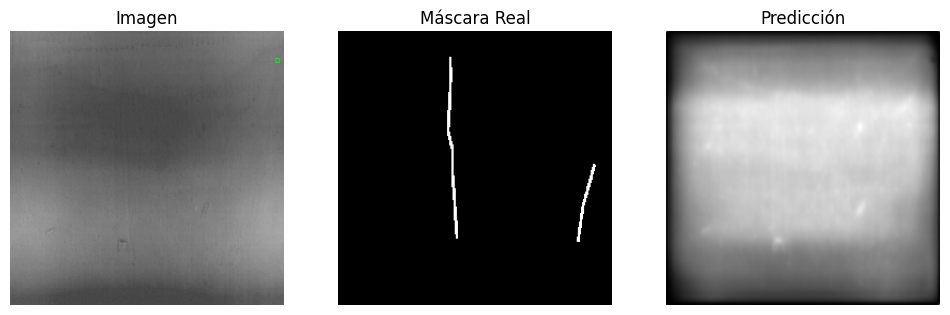

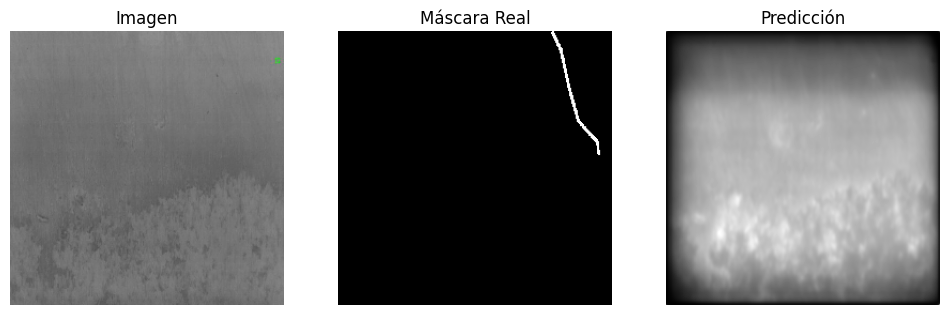

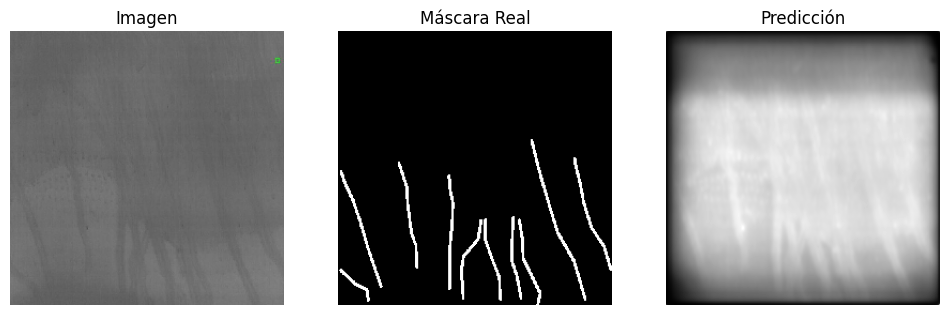

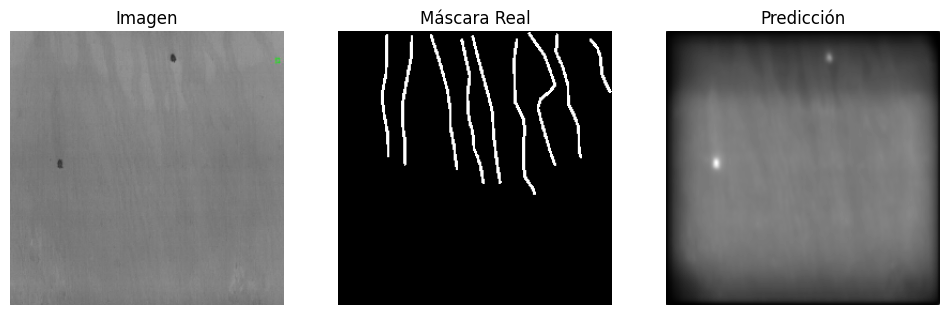

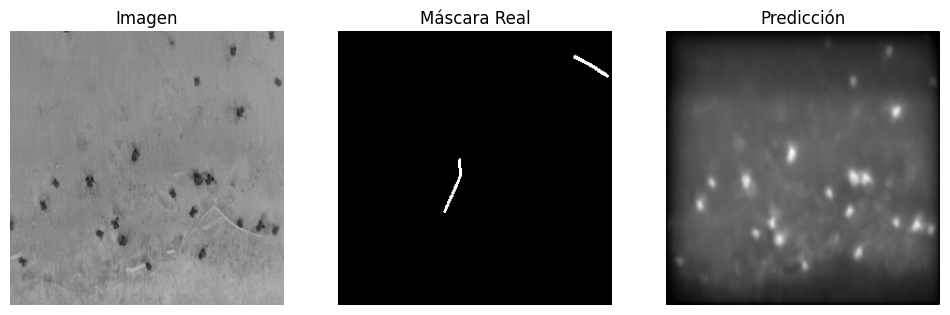

Precisión: 0.9812


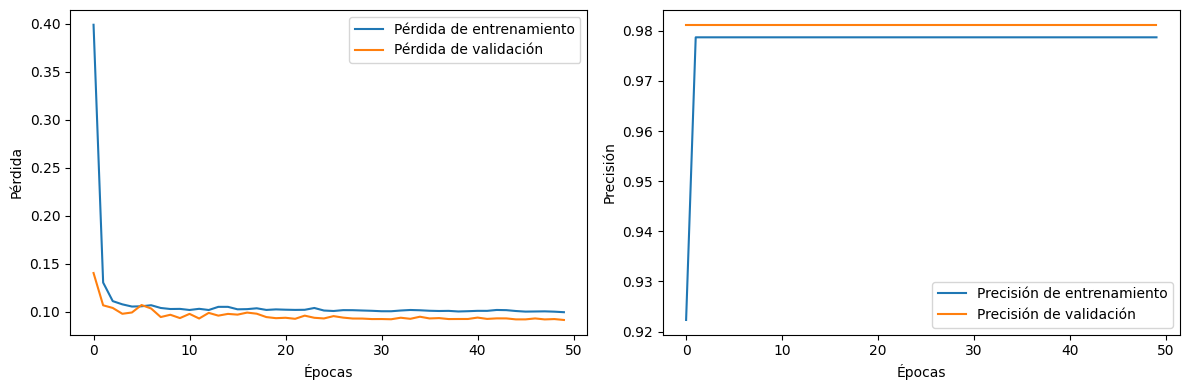

Matriz de confusión promedio:
[[64304.08333333     0.        ]
 [ 1231.91666667     0.        ]]


In [4]:
#cargar modelo
import matplotlib.pyplot as plt
from keras.models import load_model
import time
import numpy as np 
model = load_model("modelo_unet.h5")

model.summary()

# cargar el historial de entrenamiento
import pickle
with open("history_unet.pkl", "rb") as f:
    history = pickle.load(f)


# Evaluar en el conjunto de validación
inicio = time.time()
predictions = model.predict(val_images)
fin = time.time()

# Calcular el tiempo de inferencia
tiempo_total_por_frame = fin - inicio

print(f"Tiempo de inferencia: {fin - inicio:.4f} segundos")
fps = len(val_images) / (fin - inicio)
print(f"FPS: {fps:.2f} frames por segundo")


# Mostrar predicciones
def plot_predictions(images, masks, preds, num=5):
    """
    Muestra imágenes, máscaras reales y predicciones.
    """
    for i in range(num):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.title("Imagen")
        plt.imshow(images[i])
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.title("Máscara Real")
        plt.imshow(masks[i].squeeze(), cmap='gray')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title("Predicción")
        plt.imshow(preds[i].squeeze(), cmap='gray')
        plt.axis('off')

        plt.show()

plot_predictions(val_images, val_masks, predictions)

#calculamos las métricas
from sklearn.metrics import accuracy_score, precision_score

# Convertir las máscaras a valores binarios
binary_preds = (predictions > 0.5).astype(np.uint8)

# Calcular métricas
accuracy = accuracy_score(val_masks.flatten(), binary_preds.flatten())

# Mostrar métricas
print(f"Precisión: {accuracy:.4f}")

# Visualizar las métricas
import matplotlib.pyplot as plt

# Mostrar la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Pérdida de entrenamiento')
plt.plot(history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

#matriz de confusión
from sklearn.metrics import confusion_matrix
# Calcular la matriz de confusión
predicciones_binarias = (predictions > 0.5).astype(np.uint8)

confusion_matrices = []

for i in range(len(val_masks)):
    y_true = val_masks[i].flatten()
    y_pred = predicciones_binarias[i].flatten()
    confusion_matrices.append(confusion_matrix(y_true, y_pred))

# Calcular la matriz de confusión promedio
confusion_matrix_avg = np.mean(confusion_matrices, axis=0)

# Mostrar la matriz de confusión promedio
print("Matriz de confusión promedio:")
print(confusion_matrix_avg)


1/1 [==============================] - 0s 424ms/step


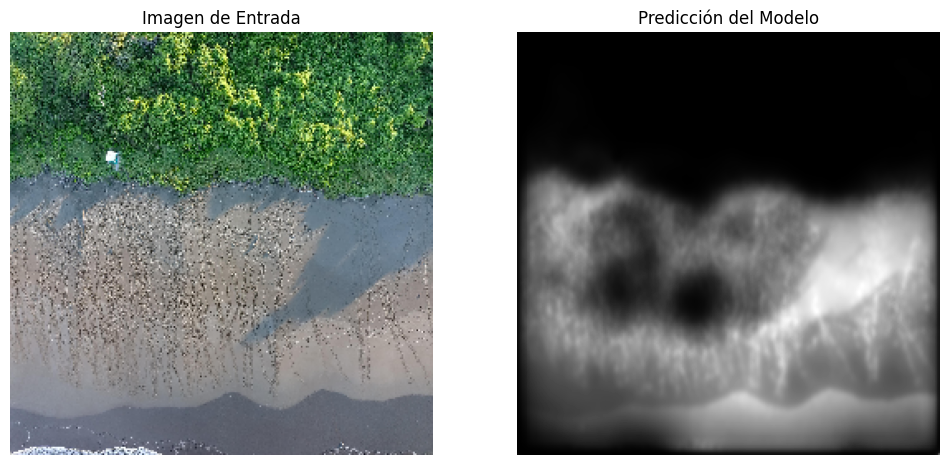

In [12]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image_path = r"C:\Users\crome\Desktop\TFM\Dades\osaconservation\Dataset_Organizado\images\108FTASK_MAX_2379.JPG"
image = load_img(image_path, target_size=(256, 256))  # Asumiendo que el modelo usa imágenes de 256x256

# Convertir a array y normalizar si es necesario
image_array = img_to_array(image) / 255.0  # Normalización a [0,1] si el modelo fue entrenado así

# Añadir una dimensión extra para el batch
image_batch = np.expand_dims(image_array, axis=0)

# Realizar la predicción
prediction = model.predict(image_batch)

# Visualizar la imagen y su predicción
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagen de Entrada")
plt.imshow(image_array)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Predicción del Modelo")
plt.imshow(prediction.squeeze(), cmap='gray')  # Mostrar la predicción
plt.axis('off')

plt.show()
